# Demo 1: Quantum Interference 
This notebook runs on Oqtant hardware and uses **9 jobs** 

## Introduction ##

One of the most striking features demonstrated by quantum matter is that of *interference*, a consequence of the wavelike and coherent nature of quantum systems.  Interference is the fundamental phenomena that enables the burgeoning field of quantum sensing.  Many of the world's most sensitive measurements of gravitational waves, accelerations, rotations, gravity, magnetic fields and time all leverage quantum interference and the interferometry techniques built upon it.  We can start exploring this vast and fascinating topic using Oqtant QMS. 

To demonstrate interference, we need to split the quantum matter into $\geq 1$ distinct spatial regions, release the trapping potential so that the spatially-separated samples can expand and overlap, and detect the interference by taking an image.  With Barrier objects and time-of-flight imaging, we have all the tools necessary to accomplish this demonstration.

Note: For further reading, see e.g. the 1997 paper [Observation of Interference Between Two Bose Condensates](https://www.rle.mit.edu/cua_pub/ketterle_group/Projects_1997/Pubs_97/andr97-Science_int.pdf) which used an experimental setup very similar to the hardware accessible by Oqtant QMS. 

### Imports and user authentication ###

In [1]:
from oqtant.schemas.quantum_matter import QuantumMatterFactory

qmf = QuantumMatterFactory()
qmf.get_login()

In [2]:
qmf.get_client()

Job Limits:
╒══════════════╤═══════════════════╤═══════════════╤═══════════════════════╕
│   Daily Used │   Daily Remaining │   Daily Limit │   Purchased Remaining │
╞══════════════╪═══════════════════╪═══════════════╪═══════════════════════╡
│            0 │                10 │            10 │                    10 │
╘══════════════╧═══════════════════╧═══════════════╧═══════════════════════╛


## Split quantum matter into two components ##

First, we will create a barrier that will be used to split our atom ensemble into two distinct spatial regions. The goal is to gently separate the cloud by slowly increasing the barrier height so that the quantum matter isn't heated or excited in the process. On the other hand, the process can't be too slow because the quantum matter clouds on either side of the barrier need to remain coherent. After splitting the cloud, the barrier and overall (magnetic) trapping potential is turned off to allow the clouds to recombine as they fall under gravity.

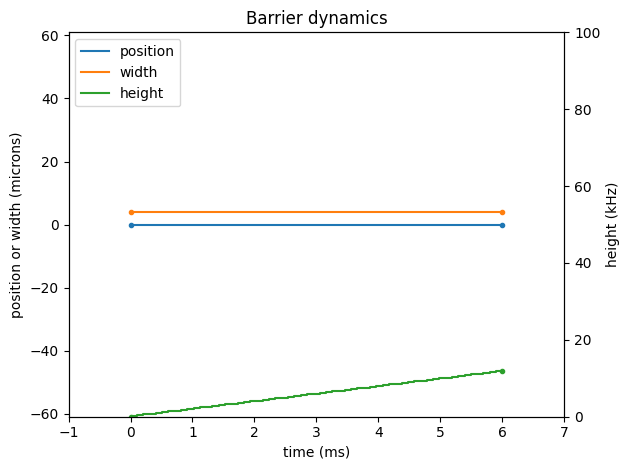

In [3]:
barrier = qmf.create_barrier(
    positions=[0, 0],  # fine tune to split the cloud into roughly equal parts
    heights=[0, 12],
    widths=[4, 4],  # adjust as free parameter to optimize observed interference
    times=[0, 6],
)

# barrier.evolve(duration=2) # can also hold the barrier for some time (after ramp-on) to explore coherence time

barrier.show_dynamics()

To explore the emergence and evolution of quantum interference, the barrier height, width, shape, ramp-on, and optional hold-time (after ramping on) can all be varied.  Another useful parameter to explore is the temperature of the quantum matter before the barrier is introduced.

## In-trap image to verify cloud has been split ##

Next, we create a QuantumMatter object to image the atom ensemble in-trap.

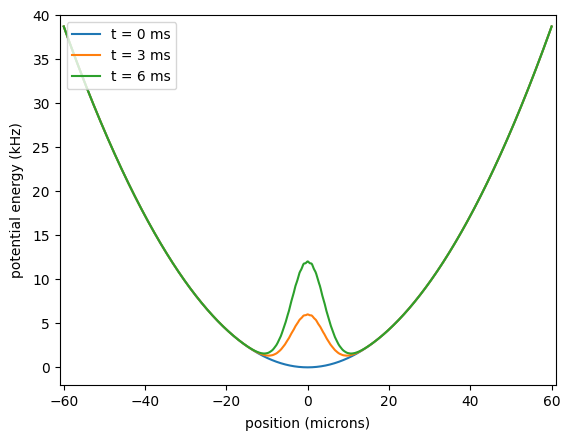

In [4]:
matter_in_trap = qmf.create_quantum_matter(
    temperature=50,  # another free parameter available for optimizing observed interference
    lifetime=barrier.death,
    barriers=[barrier],
    image="IN_TRAP",
)

matter_in_trap.show_potential(times=[0, 3, 6], ylimits=[-2, 40])

We next submit our QuantumMatter object to the client to create a job, wait for the job to execute, and fetch the results:

In [5]:
matter_in_trap.submit(track=True)

Submitting 1 job(s):

- Job: quantum matter
  Job ID: b6b7f389-9652-484d-861f-ae293729b811

Tracking 1 job(s):

- Job: quantum matter
  - RUNNING
  - COMPLETE

All job(s) complete


### Plot the resulting in-trap image ###

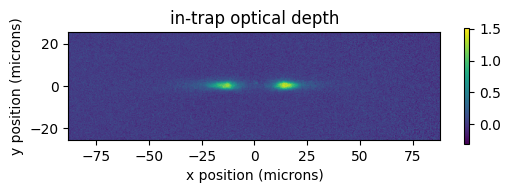

In [6]:
matter_in_trap.get_result()
matter_in_trap.output.plot_it(figsize=(6, 6))

## Observe interference in time-of-flight imaging ##

Next, let's look at the atom ensemble after releasing it from the trap. As the two regions of the quantum matter expand during the (adjustable) time of flight, they begin to spatially overlap, which results in interference.

In [7]:
tofs = [5, 7, 9, 11, 13, 15, 17, 19]
tof_matters = []
for tof in tofs:
    tof_matters.append(
        qmf.create_quantum_matter(
            temperature=50,
            barriers=[barrier],
            lifetime=barrier.death,
            image="TIME_OF_FLIGHT",
            time_of_flight=tof,
            name="interference w/ tof = " + str(tof) + " ms",
        )
    )

Submit to QMS and retrieve results, placing the resulting jobs (with outputs) in a list

In [8]:
for matter in tof_matters:
    matter.submit()

Submitting 1 job(s):

- Job: interference w/ tof = 5 ms
  Job ID: 6eed37b3-3cbe-4e84-b194-b018552e2d71
Submitting 1 job(s):

- Job: interference w/ tof = 7 ms
  Job ID: bf087c4a-ded1-4e20-95f0-113ad211ac9d
Submitting 1 job(s):

- Job: interference w/ tof = 9 ms
  Job ID: e3fbe320-9662-43f2-a389-6115bd5b8ca9
Submitting 1 job(s):

- Job: interference w/ tof = 11 ms
  Job ID: ea22440b-5b8f-49b5-a24e-7e3cc34cb8db
Submitting 1 job(s):

- Job: interference w/ tof = 13 ms
  Job ID: 277943dd-9b6e-408f-a42a-9b298745e225
Submitting 1 job(s):

- Job: interference w/ tof = 15 ms
  Job ID: d956893a-cf11-497b-afcd-d5652af6cb2d
Submitting 1 job(s):

- Job: interference w/ tof = 17 ms
  Job ID: e141c09b-d71a-42db-b85c-f57ab2bf6f07
Submitting 1 job(s):

- Job: interference w/ tof = 19 ms
  Job ID: fb379e00-12de-4780-aa82-6adfa4b0ddab


Once our sequence of interference jobs are complete and fetched, we can observe the overlapping quantum matter.  If your inputs above are tuned correctly, you should observe the onset of quantum interference! 

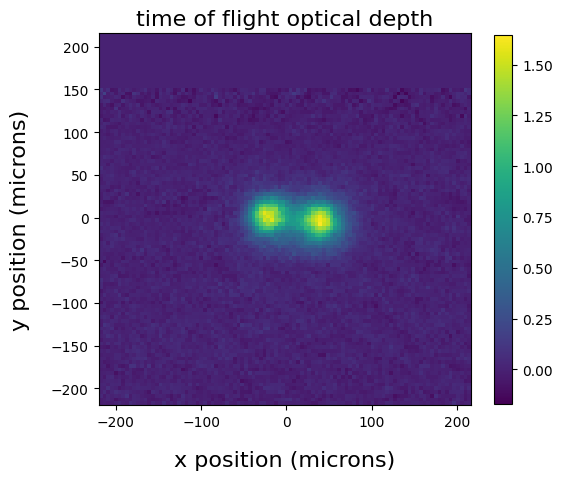

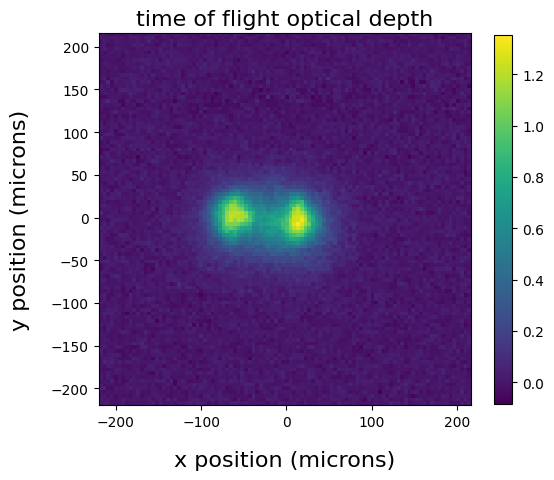

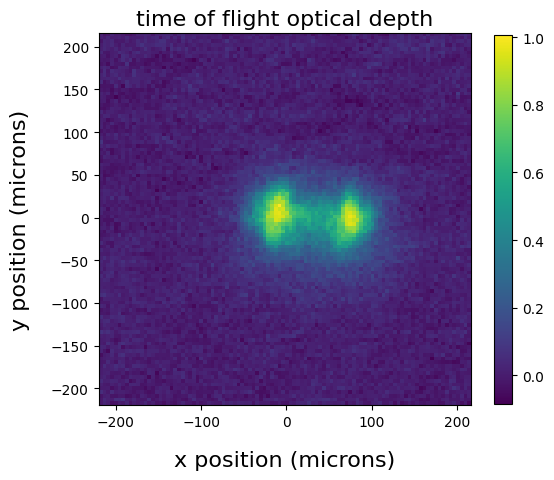

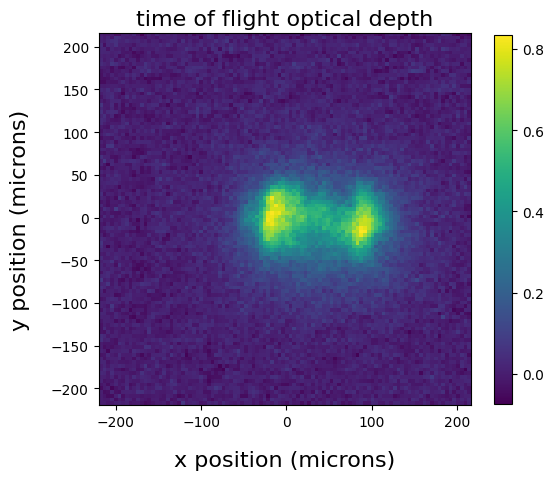

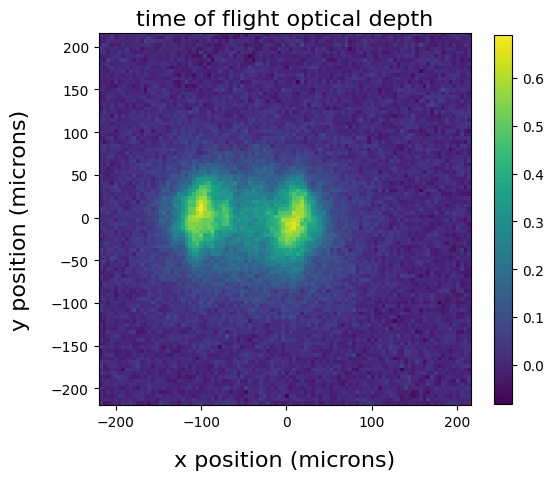

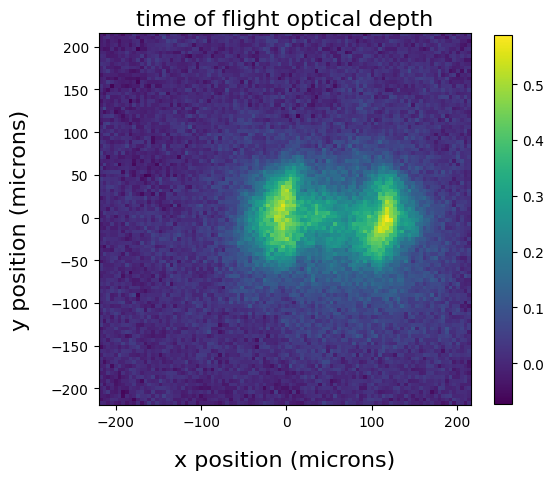

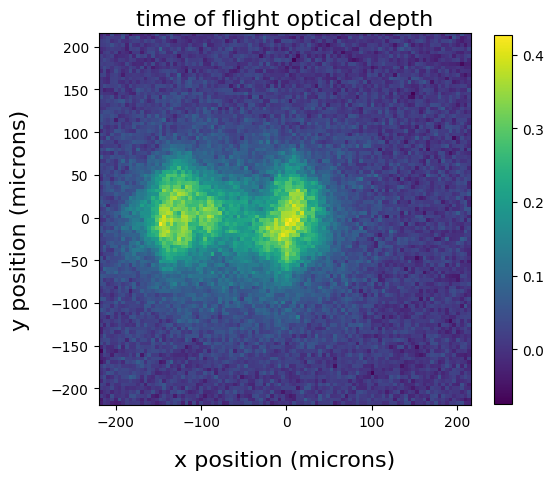

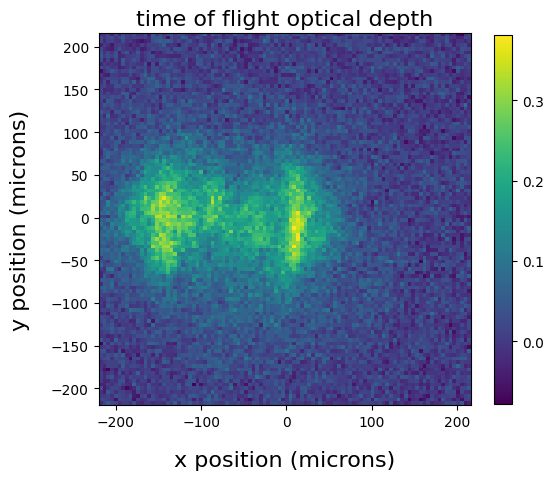

In [7]:
import matplotlib.pyplot as plt

pending_matters = [*tof_matters]

while pending_matters:
    for index, matter in enumerate(pending_matters):
        matter.get_result()
        if matter.status == "COMPLETE":
            pending_matters.pop(index)
            matter.output.plot_tof(figsize=(6, 6))

The cross sections of the overlapping quantum matter clouds is often particularly revealing:

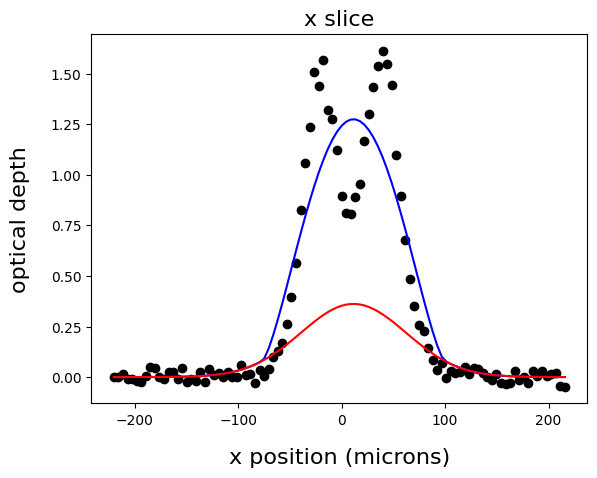

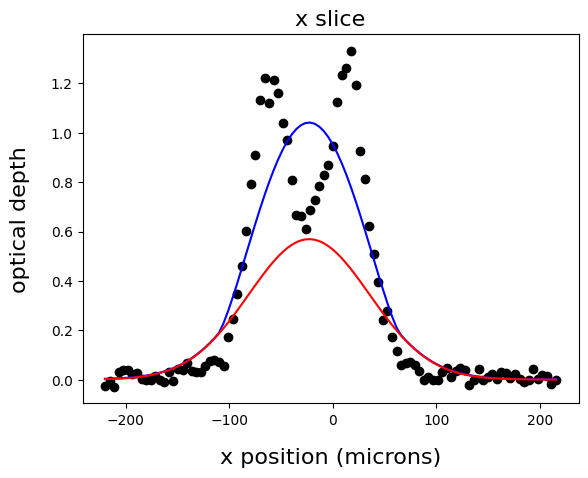

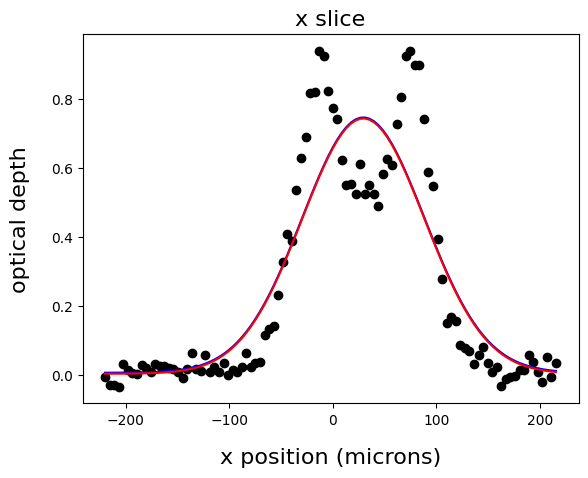

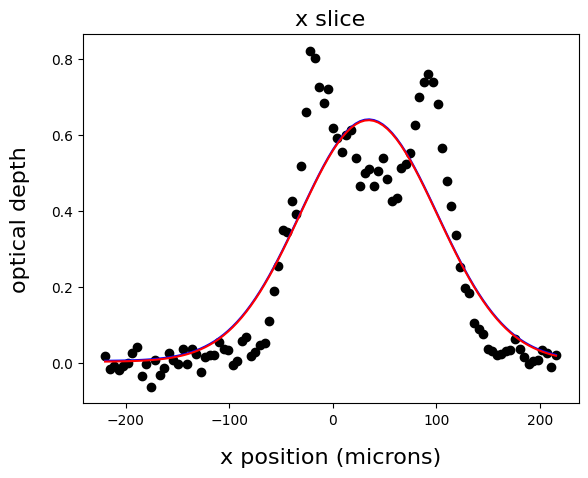

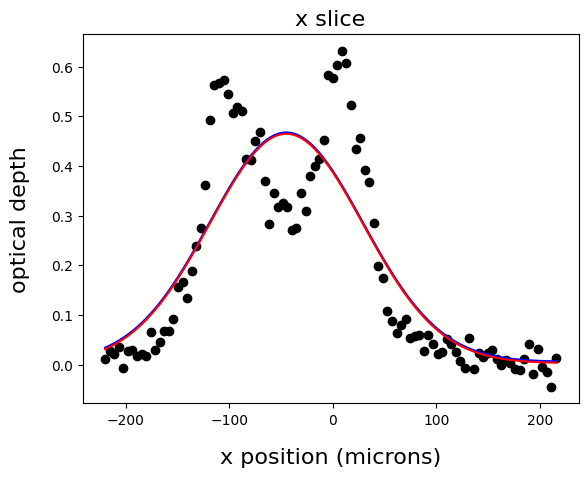

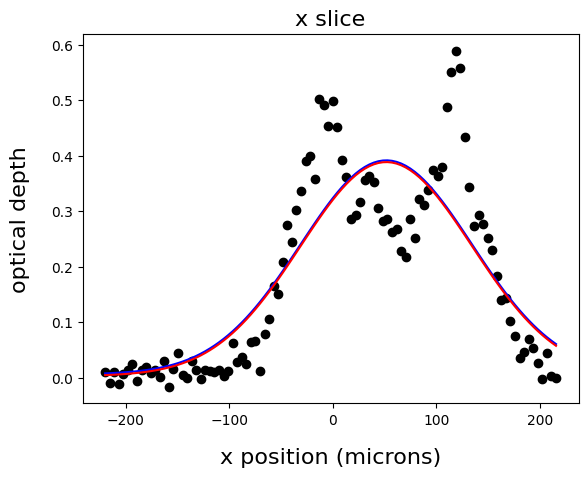

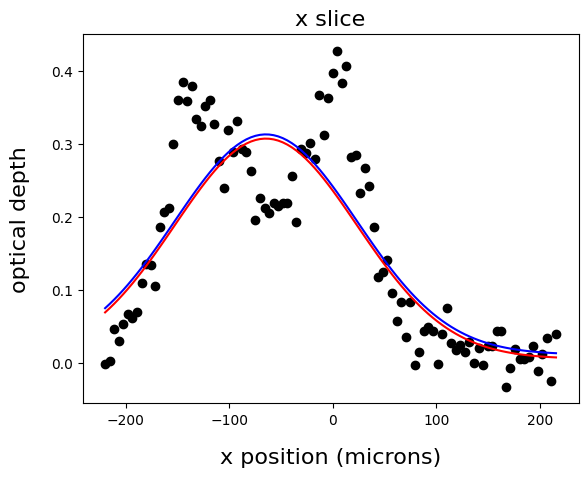

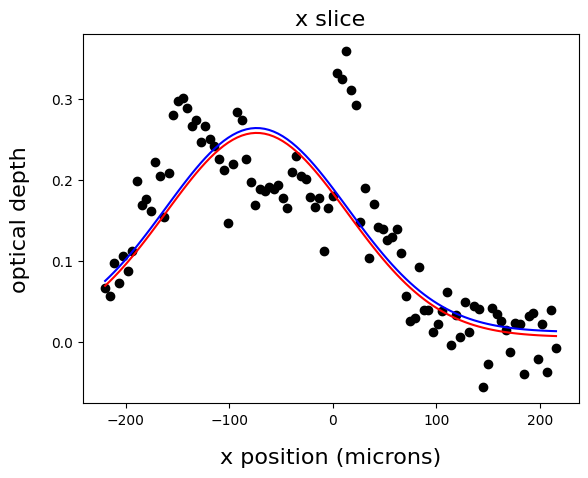

In [8]:
for matter in tof_matters:
    matter.output.plot_slice(axis="x")